In [1]:
from google.colab import files
uploaded = files.upload()


Saving customer_churn_big.csv to customer_churn_big.csv


In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv('customer_churn_big.csv')

# Preview data
df.head()


,customer_id,age,gender,income,subscription_type,avg_watch_time,complaints,feedback_score,churn
0,CUST00001,56,Male,129952,Standard,1.71,3,5,0
1,CUST00002,69,Female,74235,Premium,2.23,2,2,0
2,CUST00003,46,Female,78565,Standard,0.30,1,3,0
3,CUST00004,32,Female,75342,Basic,1.11,3,3,0
4,CUST00005,60,Male,62723,Premium,0.32,1,5,0


In [3]:
# Shape and info
print("Shape:", df.shape)
df.info()

# Check for missing values
df.isnull().sum()

# Basic statistics
df.describe()


Shape: (10000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        10000 non-null  object 
 1   age                10000 non-null  int64  
 2   gender             10000 non-null  object 
 3   income             10000 non-null  int64  
 4   subscription_type  10000 non-null  object 
 5   avg_watch_time     10000 non-null  float64
 6   complaints         10000 non-null  int64  
 7   feedback_score     10000 non-null  int64  
 8   churn              10000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 703.3+ KB


,age,income,avg_watch_time,complaints,feedback_score,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,43.539400,84663.394600,2.008009,1.506900,2.997200,0.417400
std,14.911636,37671.632977,0.998001,1.223316,1.422109,0.493155
min,18.000000,20018.000000,-1.440000,0.000000,1.000000,0.000000
25%,31.000000,51280.000000,1.320000,1.000000,2.000000,0.000000
50%,43.000000,84912.500000,2.000000,1.000000,3.000000,0.000000
75%,56.000000,117105.250000,2.680000,2.000000,4.000000,1.000000
max,69.000000,149985.000000,5.810000,9.000000,5.000000,1.000000


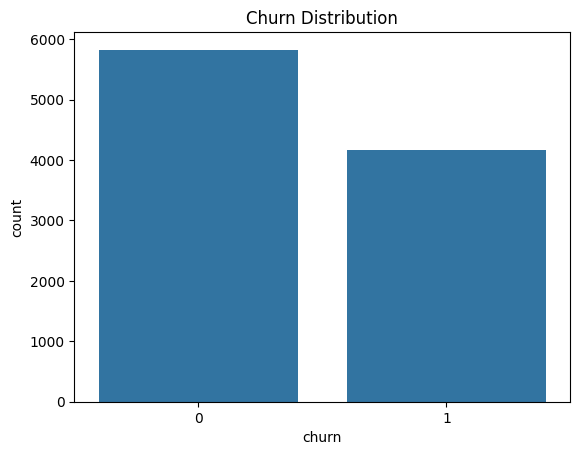

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='churn', data=df)
plt.title("Churn Distribution")
plt.show()


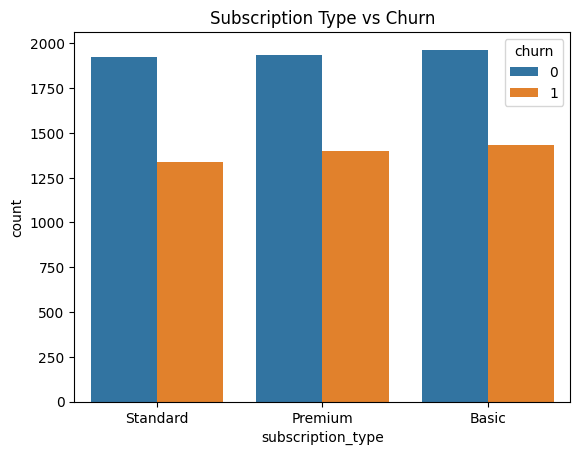

In [5]:
sns.countplot(x='subscription_type', hue='churn', data=df)
plt.title("Subscription Type vs Churn")
plt.show()


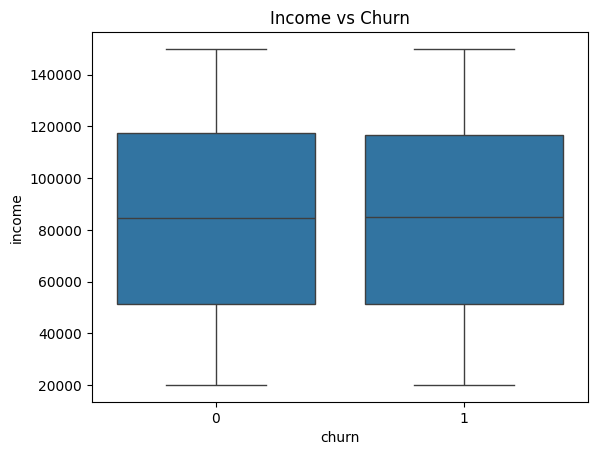

In [6]:
sns.boxplot(x='churn', y='income', data=df)
plt.title("Income vs Churn")
plt.show()


In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['subscription_type'] = le.fit_transform(df['subscription_type'])  # Basic=0, Standard=1, Premium=2


In [8]:
X = df.drop(['customer_id', 'churn'], axis=1)
y = df['churn']


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[912 258]
 [243 587]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78      1170
           1       0.69      0.71      0.70       830

    accuracy                           0.75      2000
   macro avg       0.74      0.74      0.74      2000
weighted avg       0.75      0.75      0.75      2000



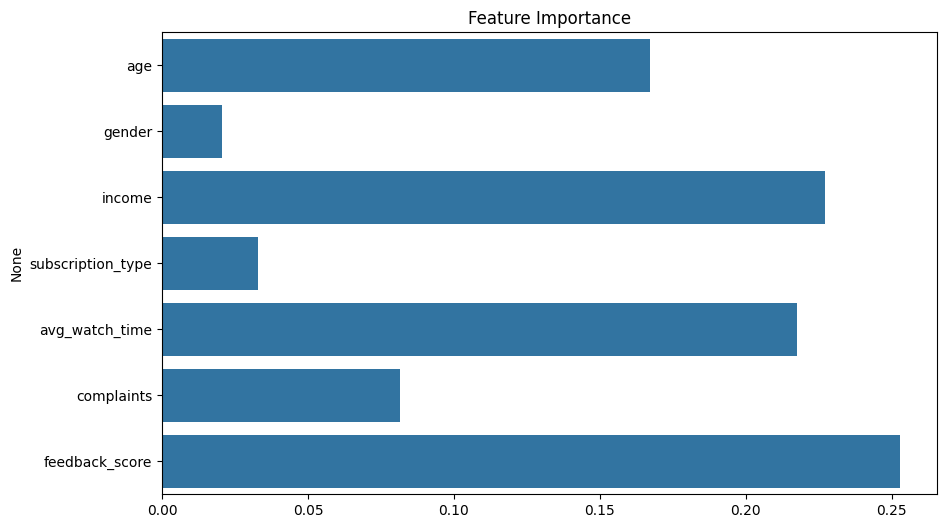

In [11]:
importances = model.feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()


In [12]:
import joblib
joblib.dump(model, 'churn_model.pkl')


['churn_model.pkl']

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

nn_model = Sequential()
nn_model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
nn_model.add(Dense(16, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4757 - loss: 5334.6846 - val_accuracy: 0.5850 - val_loss: 15.2700
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5097 - loss: 91.8396 - val_accuracy: 0.4150 - val_loss: 11.2270
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5170 - loss: 55.6433 - val_accuracy: 0.5825 - val_loss: 4.7572
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5154 - loss: 84.1513 - val_accuracy: 0.4150 - val_loss: 35.4827
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5229 - loss: 70.1583 - val_accuracy: 0.4150 - val_loss: 47.8044
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5167 - loss: 40.8174 - val_accuracy: 0.5850 - val_loss: 13.7212
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4948 - loss: 67.3107 - val_accuracy: 0.5855 - val_loss: 5.3954
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5110 - loss: 40.0301 - val_accuracy